In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/autism_screening.csv")
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [3]:
import pandas as pd

description = pd.DataFrame([
    ["index", "The participant’s ID number"],
    ["AX_Score", "Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool AQ-10"],
    ["age", "Age in years"],
    ["gender", "Male or Female"],
    ["ethnicity", "Ethnicities in text form"],
    ["jaundice", "Whether or not the participant was born with jaundice?"],
    ["autism", "Whether or not anyone in tbe immediate family has been diagnosed with autism?"],
    ["country_of_res", "Countries in text format"],
    ["used_app_before", "Whether the participant has used a screening app"],
    ["result", "Score from the AQ-10 screening tool"],
    ["age_desc", "Age as categorical"],
    ["relation", "Relation of person who completed the test"],
    ["Class/ASD", "Participant classification"]
], columns=['Feature', 'Description'])

description.set_index('Feature', inplace=True)

description

,Description
Feature,
index,The participant’s ID number
AX_Score,Score based on the Autism Spectrum Quotient (A...
age,Age in years
gender,Male or Female
ethnicity,Ethnicities in text form
jaundice,Whether or not the participant was born with j...
autism,Whether or not anyone in tbe immediate family ...
country_of_res,Countries in text format
used_app_before,Whether the participant has used a screening app


In [4]:
df.shape

(704, 21)

In [5]:
pd.DataFrame(df.dtypes,
             columns = ["Data Type"])

,Data Type
A1_Score,int64
A2_Score,int64
A3_Score,int64
A4_Score,int64
A5_Score,int64
A6_Score,int64
A7_Score,int64
A8_Score,int64
A9_Score,int64
A10_Score,int64


In [6]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [7]:
pd.DataFrame(df.isnull().sum(), 
             columns=["Missing Values"]).style.bar(color = "#84A9AC")

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


In [8]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

In [9]:
# Get object type columns
object_cols = df.select_dtypes('O').columns

# Create new DataFrame
object_df = pd.DataFrame({
    'Objects': object_cols,
    'Unique values': [df[col].unique() for col in object_cols],
    'number of unique values':[df[col].nunique()for col in object_cols]
})

object_df

,Objects,Unique values,number of unique values
0,gender,"[f, m]",2
1,ethnicity,"[White-European, Latino, ?, Others, Black, Asi...",12
2,jundice,"[no, yes]",2
3,austim,"[no, yes]",2
4,contry_of_res,"[United States, Brazil, Spain, Egypt, New Zeal...",67
5,used_app_before,"[no, yes]",2
6,age_desc,[18 and more],1
7,relation,"[Self, Parent, ?, Health care professional, Re...",6
8,Class/ASD,"[NO, YES]",2


In [10]:
for col in ['ethnicity','contry_of_res','relation']:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

-------------------------------
Column name: ethnicity

Unique values:
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


-------------------------------
Column name: contry_of_res

Unique values:
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 'Iceland' 'Nicaragua'
 'Hong Kong' 'Japan' 'Ukraine' 'Kazakhstan' 'AmericanSamoa' 'Uruguay'
 'Serbia' 'Portugal' 'Malaysia' 'Ecuador' 'Niger' 'Belgium' 'Bolivia'
 'Aruba' 'Finland' 'Turkey' 'Nepal' 'Indonesia' 'Angola' 'Azerbaijan'
 'Iraq' 'Czech Re

In [11]:
df['ethnicity'] = df['ethnicity'].replace(["others"], 'Others')
df['ethnicity'].isin(['?']).sum()

95

In [13]:
from sklearn.impute import SimpleImputer

df_org = df.copy()

# replace '?' with NaN
df['ethnicity'].replace('?', np.nan, inplace=True)

#Imputing null values with most_frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df['ethnicity'] = imputer.fit_transform(df[['ethnicity']]).ravel()

print(df['ethnicity'].isnull().sum())

0


In [14]:
df['relation'].isin(['?']).sum()

95

In [15]:
df['relation'].unique()

array(['Self', 'Parent', '?', 'Health care professional', 'Relative',
       'Others'], dtype=object)

In [17]:
# replace '?' with NaN
df['relation'].replace('?', np.nan, inplace=True)

#Imputing null values with most_frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df['relation'] = imputer.fit_transform(df[['relation']]).ravel()

print(df['relation'].isnull().sum())

0


In [18]:
df['relation'].isin(['?']).sum()

0

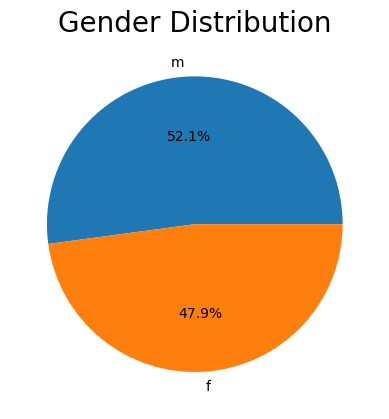

In [19]:
import matplotlib.pyplot as plt

# Calculate the counts of each sex category
sex_counts = df['gender'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%')

# Set the title
ax.set_title('Gender Distribution', fontsize=20)

# Equal aspect ratio ensures circular shape
ax.set_aspect('equal')

# Show the chart
plt.show()

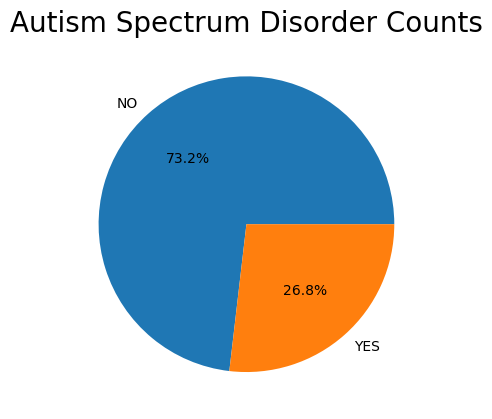

In [21]:
import matplotlib.pyplot as plt

# Calculate the counts of each ASD trait category
asd_counts = df['Class/ASD'].value_counts()

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the pie chart
ax.pie(asd_counts, labels=asd_counts.index, autopct='%1.1f%%')

# Set the title
ax.set_title('Autism Spectrum Disorder Counts', fontsize=20)

# Show the chart
plt.show()

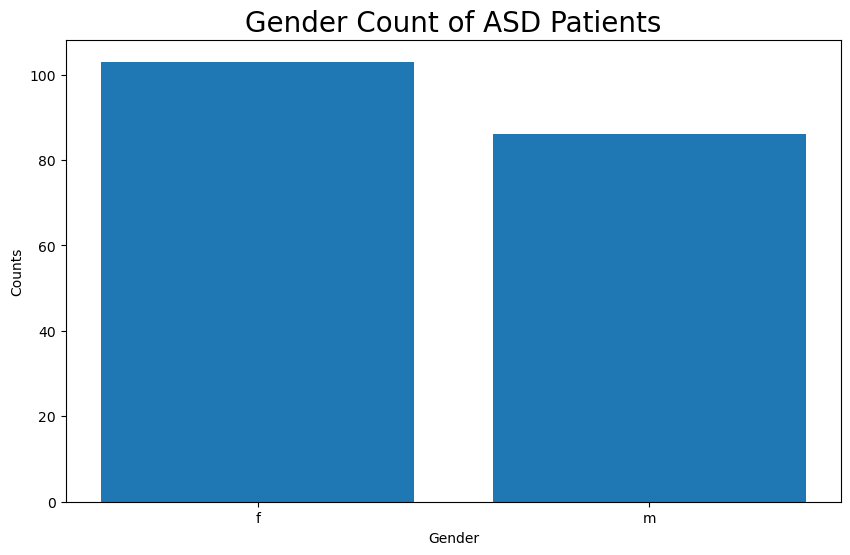

In [22]:
# Filter the data for ASD patients
filtered_data = df[df['Class/ASD'] == "YES"]

# Group by Sex and calculate counts
sex_counts = filtered_data.groupby('gender').size().reset_index(name='counts')

# Create the bar plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(sex_counts['gender'], sex_counts['counts'])
plt.title("Gender Count of ASD Patients", fontsize=20)
plt.xlabel("Gender")
plt.ylabel("Counts")

plt.show()

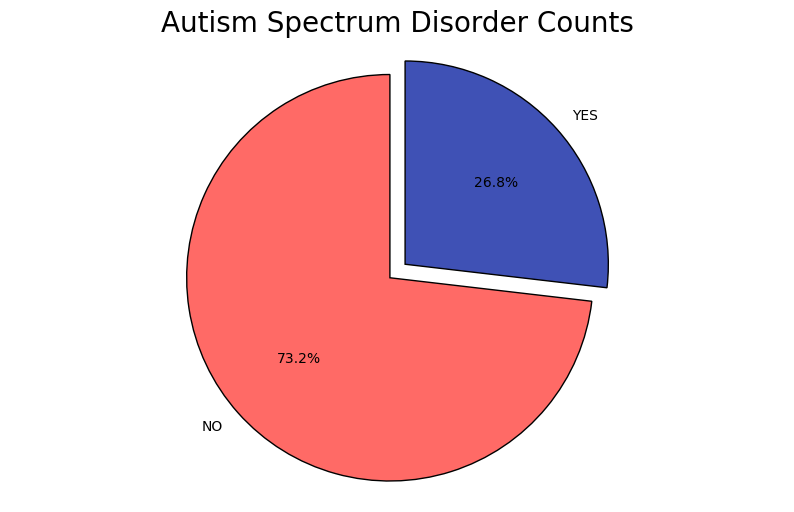

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of each class
class_counts = df['Class/ASD'].value_counts()

# Create pie chart
plt.figure(figsize=(10, 6))
labels = class_counts.index
sizes = class_counts.values
colors = ['#FF6A66', '#3F51B5']
explode = (0.1, 0)  # Explode the first slice

plt.pie(sizes, labels=labels, colors=colors, explode=explode,
        autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Autism Spectrum Disorder Counts', fontsize=20)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Set font size for labels
plt.rcParams['font.size'] = 12

# Show the plot
plt.show()

In [24]:
asd_patients_country_wise = pd.DataFrame(df[df['Class/ASD'] == "YES"]['contry_of_res'].value_counts()).rename({"contry_of_res":"ASD_Patient_Counts"}, axis = 1)
asd_patients_country_wise.style.bar(color="#84A9AC") 

,count
contry_of_res,
United States,53
United Kingdom,29
New Zealand,15
Australia,12
Canada,10
India,6
France,5
Brazil,5
Malaysia,4


In [25]:
gen_counts = df[df['Class/ASD'] == 'YES'].groupby(['contry_of_res', 'gender']).size().unstack(fill_value=0)
gen_counts.columns.name = None  # Remove the "gender" label from the column index
gen_counts.reset_index(inplace=True)  # Move "Country" from index to column

# Add a new column for total frequency of ASD patients
gen_counts['Total'] = gen_counts['f'] + gen_counts['m']

gen_counts

,contry_of_res,f,m,Total
0,Afghanistan,1,1,2
1,AmericanSamoa,0,1,1
2,Argentina,0,1,1
3,Australia,8,4,12
4,Austria,2,1,3
5,Bahamas,0,1,1
6,Bangladesh,0,1,1
7,Belgium,0,1,1
8,Brazil,2,3,5
9,Canada,8,2,10


In [26]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,White-European,no,no,Egypt,no,2.0,18 and more,Self,NO


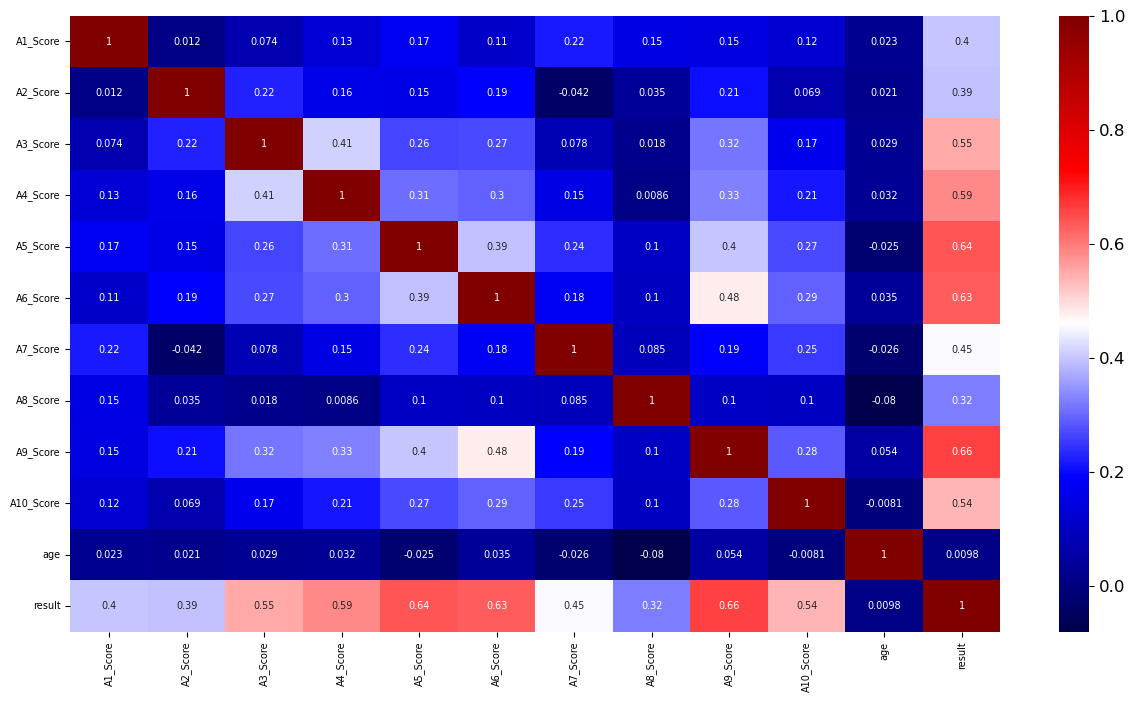

In [31]:
# Select columns type int
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Generate the heatmap
plt.figure(figsize=(15, 8))
ax = sns.heatmap(numeric_columns.corr(), annot=True, cmap="seismic", annot_kws={"fontsize":7})
ax.tick_params(axis='both', which='major', labelsize=7)
plt.show()

In [32]:
df_v1=df.copy()
df_v1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,White-European,no,no,Egypt,no,2.0,18 and more,Self,NO


In [33]:
object_cols = [col for col in df_v1.columns if df_v1[col].dtype == "object"]
print({col: (df_v1[col].nunique(), str(df_v1[col].dtype)) for col in object_cols},"\n")

print(object_cols)

{'gender': (2, 'object'), 'ethnicity': (10, 'object'), 'jundice': (2, 'object'), 'austim': (2, 'object'), 'contry_of_res': (67, 'object'), 'used_app_before': (2, 'object'), 'age_desc': (1, 'object'), 'relation': (5, 'object'), 'Class/ASD': (2, 'object')} 

['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']


In [34]:
freq = df_v1['contry_of_res'].value_counts(normalize=True)

# Map the values to their frequencies
df_v1['contry-freq'] = df_v1['contry_of_res'].map(freq)
df_v1.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD,contry-freq
0,1,1,1,1,0,0,1,1,0,0,...,White-European,no,no,United States,no,6.0,18 and more,Self,NO,0.160511
1,1,1,0,1,0,0,0,1,0,1,...,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO,0.012784
2,1,1,0,1,1,0,1,1,1,1,...,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES,0.004261
3,1,1,0,1,0,0,1,1,0,1,...,White-European,no,yes,United States,no,6.0,18 and more,Self,NO,0.160511
4,1,0,0,0,0,0,0,1,0,0,...,White-European,no,no,Egypt,no,2.0,18 and more,Self,NO,0.004261


In [35]:
#remove "contry_of_res"
df_v2=df_v1.drop("contry_of_res", axis=1)

In [36]:
#we wanna remove "contry_of_res from object_cols"
object_cols.remove("contry_of_res")
print(object_cols)

['gender', 'ethnicity', 'jundice', 'austim', 'used_app_before', 'age_desc', 'relation', 'Class/ASD']


In [37]:
df_v3=df_v2.replace({'jundice': "yes"}, 1).replace({'jundice' : "no"}, 0).replace({'austim': "yes"}, 1).replace({'austim' : "no"}, 0).replace({'used_app_before': "yes"}, 1).replace({'used_app_before' : "no"}, 0)

In [38]:
df_v3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,used_app_before,result,age_desc,relation,Class/ASD,contry-freq
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,0,0,0,6.0,18 and more,Self,NO,0.160511
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,0,1,0,5.0,18 and more,Self,NO,0.012784
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,1,1,0,8.0,18 and more,Parent,YES,0.004261
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,0,1,0,6.0,18 and more,Self,NO,0.160511
4,1,0,0,0,0,0,0,1,0,0,...,f,White-European,0,0,0,2.0,18 and more,Self,NO,0.004261


In [39]:
#removing bool cols from object cols
object_cols.remove('jundice')
object_cols.remove('used_app_before')
object_cols.remove('austim')
print(object_cols)

['gender', 'ethnicity', 'age_desc', 'relation', 'Class/ASD']


In [40]:
from sklearn.preprocessing import OrdinalEncoder

# initialize the encoder
encoder = OrdinalEncoder()

# fit and transform the data
encoded_data = encoder.fit_transform(df_v3[["gender",'Class/ASD']])
# convert the encoded data back to a dataframe
encoded_df = pd.DataFrame(encoded_data, columns=["gender_encoded",'Class/ASD_en'])
encoded_df.head()

,gender_encoded,Class/ASD_en
0,0.0,0.0
1,1.0,0.0
2,1.0,1.0
3,0.0,0.0
4,0.0,0.0


In [41]:
df_v3['relation'].value_counts()

relation
Self                        617
Parent                       50
Relative                     28
Others                        5
Health care professional      4
Name: count, dtype: int64

In [44]:
# df_v2.replace({'relation': "self"},5).replace({'relation' : "Parent"}, 2).replace({'austim': "yes"}, 1).replace({'austim' : "no"}, 0).replace({'used_app_before': "yes"}, 1).replace({'used_app_before' : "no"}, 0).head()

In [45]:
object_cols.remove('gender')
object_cols.remove('Class/ASD')

In [46]:
print(object_cols)

['ethnicity', 'age_desc', 'relation']


In [47]:
df_v1["age_desc"].nunique()

1

In [48]:
df_v4=df_v3.drop('age_desc',axis=1)
df_v4.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,used_app_before,result,relation,Class/ASD,contry-freq
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,0,0,0,6.0,Self,NO,0.160511
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,0,1,0,5.0,Self,NO,0.012784
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,1,1,0,8.0,Parent,YES,0.004261
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,0,1,0,6.0,Self,NO,0.160511
4,1,0,0,0,0,0,0,1,0,0,40.0,f,White-European,0,0,0,2.0,Self,NO,0.004261


In [49]:
object_cols.remove('age_desc')

In [50]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the data
X_encoded = []
for col in object_cols:
    col_data = df_v4[col].values.reshape(-1, 1)  # Reshape data to 2D array
    col_encoded = encoder.fit_transform(col_data)
    X_encoded.append(col_encoded)

# Concatenate encoded columns
X_encoded = np.concatenate(X_encoded, axis=1)
X_encoded_df = pd.DataFrame(X_encoded) # Convert numpy array to DataFrame

# select only the columns with numeric data types
num_df = df.select_dtypes(include=['int', 'float'])

# Add one-hot encoded columns to numerical features
df_v2= pd.concat([num_df,encoded_df, X_encoded_df], axis=1)
df_v2.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,5,6,7,8,9,10,11,12,13,14
0,1,1,1,1,0,0,1,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1,1,0,1,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,1,0,1,1,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1,1,0,1,0,0,1,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


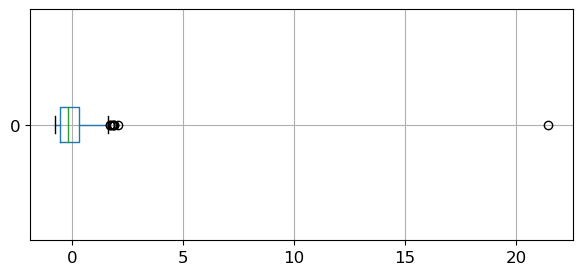

In [51]:
from sklearn.preprocessing import StandardScaler

features = df_v2['age']
target = df_v2["Class/ASD_en"]

scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features.values.reshape(-1, 1)))
data_boxplot = features_scaled.boxplot(return_type='dict', vert=False, figsize=(7,3))

In [52]:
Q1 = np.percentile(features_scaled, 25)
Q3 = np.percentile(features_scaled, 75)

upper_whisker = Q3 + 1.5 * (Q3-Q1)
upper_whisker

1.5966923382369655

In [53]:
outliers = features_scaled[(features_scaled > 1.597).all(axis=1)]
outliers

,0
7,2.082357
52,21.448245
71,1.718109
203,1.839525
309,1.718109
431,1.900233
448,1.778817
495,1.900233


In [54]:
df.iloc[[7,52,71,203,309,431,448,495],10:22]

,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
7,64.0,m,White-European,no,no,New Zealand,no,5.0,18 and more,Parent,NO
52,383.0,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO
71,58.0,m,Asian,no,no,New Zealand,no,3.0,18 and more,Self,NO
203,60.0,f,White-European,no,yes,United States,no,9.0,18 and more,Relative,YES
309,58.0,f,Middle Eastern,no,no,United Kingdom,no,7.0,18 and more,Self,YES
431,61.0,m,White-European,yes,yes,Uruguay,no,10.0,18 and more,Self,YES
448,59.0,m,White-European,no,no,United States,no,9.0,18 and more,Self,YES
495,61.0,f,White-European,no,no,United States,no,3.0,18 and more,Self,NO


In [55]:
average_age = df_v2['age'].mean()  # Calculate the average age
df_v2.iloc[52, 10] = average_age   # Set the value at row 52, column 10 to the average age
df_v2.iloc[52, 10]

29.698863636363637

In [56]:
# Get the column to be transferred (column number 15)
column_17 = df_v2.pop(df_v2.columns[17])  # Note: Column indices start from 0

# Add the column at the end of the DataFrame
df_v2['target'] = column_17

# Save the modified DataFrame back to a new CSV file
df_v2.to_csv('modified_file.csv', index=False)
df_v2.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,6,7,8,9,10,11,12,13,14,target
0,1,1,1,1,0,0,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,1,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,1,0,1,1,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,0,1,0,0,1,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
df_v2.columns

Index([      'A1_Score',       'A2_Score',       'A3_Score',       'A4_Score',
             'A5_Score',       'A6_Score',       'A7_Score',       'A8_Score',
             'A9_Score',      'A10_Score',            'age',         'result',
       'gender_encoded',   'Class/ASD_en',                0,                1,
                      2,                4,                5,                6,
                      7,                8,                9,               10,
                     11,               12,               13,               14,
               'target'],
      dtype='object')

In [58]:
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, PowerTransformer, Normalizer

import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
df_v2.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,6,7,8,9,10,11,12,13,14,target
0,1,1,1,1,0,0,1,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,0,1,0,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1,1,0,1,1,0,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1,1,0,1,0,0,1,1,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
X = df_v2.iloc[:, :-1]
y = df_v2.iloc[:, -1:]
X.columns = X.columns.astype(str)

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import pandas as pd

# Assumindo que X e y foram previamente definidos

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_estimators = 50
names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
         'SupportVectorMachine', 'AdaBoostClassifier', 'KNearestNeighbor', 'NaiveBayes', 'SGDClassifier']
models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    SVC(C=1.0, kernel='rbf', degree=3, gamma='scale'),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=None),
        n_estimators=n_estimators
    ),
    KNeighborsClassifier(n_neighbors=3),
    GaussianNB(),
    SGDClassifier()
]

# Create an empty dictionary to store the results
results = {'Model': [], 'Accuracy': [], 'Sensitivity': [], 'Specificity': [], 'Mean Score': []}
for counter, model in enumerate(models):
    # Convert y_train and y_test to 1-dimensional arrays
    y_train_flat = np.ravel(y_train)
    y_test_flat = np.ravel(y_test)

    # Train the model
    if isinstance(model, KNeighborsClassifier):
        # Convertendo os dados de treino e teste para arrays NumPy
        X_train_np = X_train.values
        X_test_np = X_test.values

        # Certificando-se de que os rótulos de treino também são arrays NumPy
        y_train_flat_np = y_train_flat
        y_test_flat_np = y_test_flat

        # Treinando o modelo
        model.fit(X_train_np, y_train_flat_np)

        # Fazendo previsões
        y_pred = model.predict(X_test_np)
    else:
        model.fit(X_train, y_train_flat)
        y_pred = model.predict(X_test)

    # Calculate true positive, false positive, true negative, false negative
    tn, fp, fn, tp = confusion_matrix(y_test_flat, y_pred).ravel()

    # Calculate accuracy
    accuracy = accuracy_score(y_test_flat, y_pred)

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Store the results in the dictionary
    results['Model'].append(names[counter])
    results['Accuracy'].append(accuracy)
    results['Sensitivity'].append(sensitivity)
    results['Specificity'].append(specificity)
    results['Mean Score'].append((accuracy + sensitivity + specificity) / 3)

# Create a dataframe from the results dictionary
scores = pd.DataFrame(results)

sorted_df = scores.sort_values(by='Mean Score', ascending=False)
sorted_df


,Model,Accuracy,Sensitivity,Specificity,Mean Score
0,DecisionTreeClassifier,1.000000,1.0,1.000000,1.000000
4,AdaBoostClassifier,1.000000,1.0,1.000000,1.000000
6,NaiveBayes,1.000000,1.0,1.000000,1.000000
7,SGDClassifier,1.000000,1.0,1.000000,1.000000
1,RandomForestClassifier,0.995283,0.0,1.000000,0.665094
2,ExtraTreesClassifier,0.995283,0.0,1.000000,0.665094
3,SupportVectorMachine,0.995283,0.0,1.000000,0.665094
5,KNearestNeighbor,0.985849,0.0,0.990521,0.658790


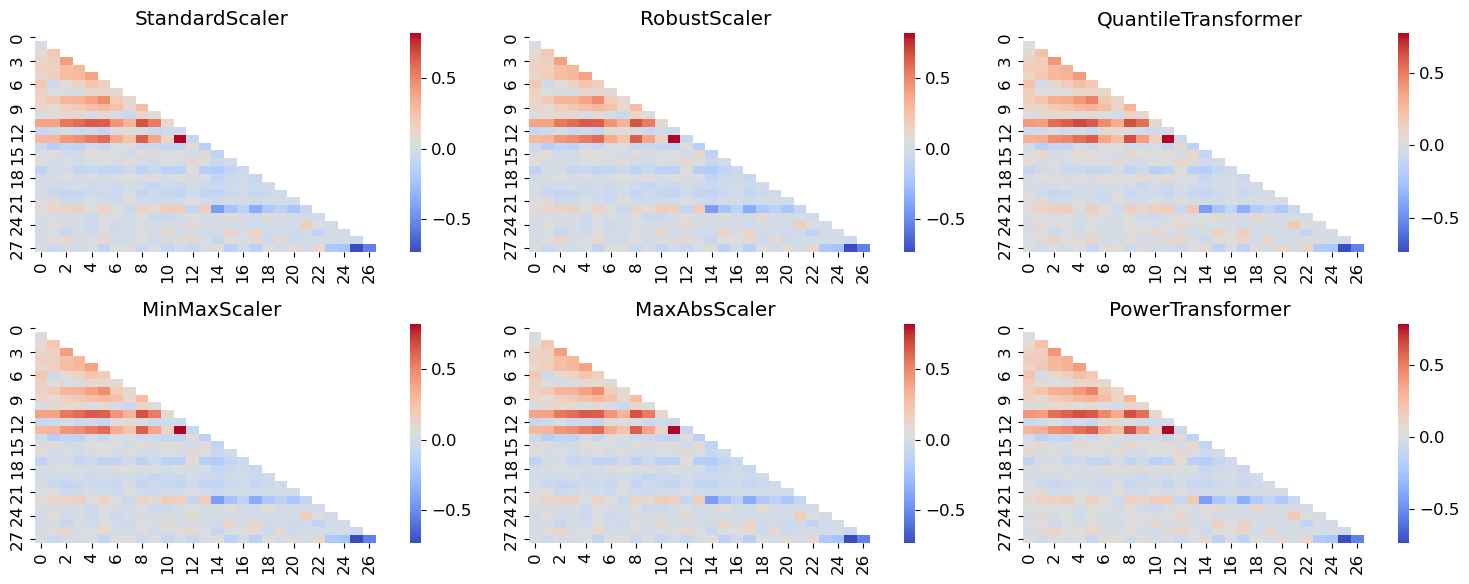

In [63]:
scaling_techniques = [
    StandardScaler(), 
    RobustScaler(), 
    QuantileTransformer(), 
    MinMaxScaler(),
    MaxAbsScaler(),
    PowerTransformer(),
    #Normalizer()
]

# Create a list of subplots with a 2x4 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 6))

# Loop through each subplot and scaling technique
for i, ax in enumerate(axs.flat):
    scaler = scaling_techniques[i]
    
    # Scale the features using the current technique
    X_scaled = scaler.fit_transform(X)
    
    # Concatenate the scaled features with the target variables
    df_scaled = pd.concat([pd.DataFrame(X_scaled)], axis=1)
    
    # Create a mask to show only the lower part of the correlation matrix
    mask = np.triu(np.ones_like(df_scaled.corr(), dtype=bool))
        # Create a heatmap of the correlation matrix showing only the lower part
    sns.heatmap(df_scaled.corr(), cmap='coolwarm', annot=False, mask=mask, ax=ax)
    ax.set_title(f'{type(scaler).__name__}')
    
# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

In [64]:
Best_scaling_techniques=[
    StandardScaler(), 
    MaxAbsScaler(), 
]

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

results_df = pd.DataFrame(columns=[type(scaler).__name__ for scaler in Best_scaling_techniques], index=names)

for scaler in Best_scaling_techniques:
    # Scale the features using RobustScaler
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.7, random_state=25)

    names = ['DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier',
         'SupportVectorMachine', 'AdaBoostClassifier','KNearestNeighbor','NaiveBayes','SGDClassifier']
    models = [
        DecisionTreeClassifier(max_depth=50, min_samples_leaf=60),
        RandomForestClassifier(n_estimators=250,max_depth=10, min_samples_leaf=25),
        ExtraTreesClassifier(n_estimators=n_estimators),
        SVC(C=1.0, kernel='rbf', degree=3, gamma='scale'),
        AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=50, min_samples_leaf=60),
            n_estimators=250
        ),
        KNeighborsClassifier(n_neighbors=3),
        GaussianNB(),
        SGDClassifier()
    ]

    for counter, model in enumerate(models):
        # Convert y_train and y_test to 1-dimensional arrays
        y_train_flat = np.ravel(y_train)
        y_test_flat = np.ravel(y_test)
        
        # Train
        model.fit(X_train, y_train_flat)
        
        # Use X_test diretamente
        X_test_np = X_test

        y_pred = model.predict(X_test_np)
        results_df.loc[names[counter], type(scaler).__name__] = metrics.accuracy_score(y_test_flat, y_pred)

results_df.head()


,StandardScaler,MaxAbsScaler
DecisionTreeClassifier,0.973631,0.973631
RandomForestClassifier,0.973631,0.973631
ExtraTreesClassifier,0.973631,0.973631
SupportVectorMachine,0.973631,0.973631
AdaBoostClassifier,0.96146,0.959432
